# Prediction of house prices using multivariate linear regression

## 1. Introduction

This is a classic example for beginners in machine learning. The dataset contains the house sales for King County, USA, between May 2014 and May 2015. You can find the full dataset on [Kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction). Before continuing, it is highly recommended that you click the aforementioned link and get to know the original dataset.

Our aim is to apply multivariate linear regression so as to predict the price of any given house in that area, given a number of its features (e.g. number of bathrooms, year on which the house was built, etc.). For this purpose however, only NumPy and Pandas libraries are used (as well as Matplotlib and Seaborn for the visualizations). Although some may find the code to be unnecessarily lengthy and detailed, I believe that it can provide the reader with a good grasp of what is really happening in such models and thus, can have great educational value (especially for beginners). The code is largely based on Stanford's Machine Learning course on [Coursera](https://www.coursera.org/learn/machine-learning/) by Andrew Ng and can be very helpful for those who have taken it and wish to see an implementation in Python.

If you have any questions or feedback, please feel free to contact me. Please do not forget to upvote if you like this kernel!

## 2. Initial exploration of the dataset

In this section, we are going to set our environment up by importing the necessary libraries, as well as loading our data into a Pandas dataframe.

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read the house data into a data frame
df = pd.read_csv('../Data_Set/kc_house_data.csv')

Now, we can go ahead and see how our dataset looks like, while also getting an idea of its statistical properties. 

In [2]:
# Print the first five entries
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Describe the dataset
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We can see that each entry has an id, i.e. an identification number, as well as a date, i.e. the date on which the transaction took place. These two columns are irrelevant to our analysis; so we will go ahead and remove them.

In [4]:
# Drop the id and date columns
df = df.drop(['id', 'date'], axis=1)

The attentive reader will already have noticed that there are 21613 observations or entries. Let's confirm it.

In [5]:
# Print the number of data observations
len(df)

21613

However, we also need to see how many features there are in our dataset.

In [6]:
# Print the number of starting features
len(df.columns)

19

Since the number of features is small, it would probably be a good idea to try an alternative implementation, using the normal equation method. Nevertheless, we will go ahead and check the data types and whether they have correctly been interpreted.

In [7]:
# Check the types of data
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In addition, it is always a good idea to check for any missing values or "NaN" in the dataset. However, our data is very clean.

In [8]:
# Print the number of null data observations
df.isnull().values.sum()

0

## 3. Feature selection

In this section, we are going to use a filter method so as to select which features are going to actually be used by the linear regression algorithm. First of all though, we have to specify which is the target variable we want to predict (price) and which are the features we are going to use (all others).

In [9]:
# Specify target and features
target = df.iloc[:, 0].name
features = df.iloc[:, 1:].columns.tolist()
features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

At this point we are going to check the correlations between our target variable (price) and the features.

In [10]:
# Correlations of features with target variable
correlations = df.corr()
correlations['price']

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

Using a filter method, we are going to select which features are to be used subsequently. Although this is arbitrary and contestable, we will remove all features with an absolute correlation with the target variable which is smaller than 0.1.

In [11]:
# Correlations with target variable
cor_target = abs(correlations['price'])

# Display features with correlation < 0.1
removed_features = cor_target[cor_target < 0.1]
removed_features

sqft_lot      0.089661
condition     0.036362
yr_built      0.054012
zipcode       0.053203
long          0.021626
sqft_lot15    0.082447
Name: price, dtype: float64

In [12]:
# Remove features with correlation < 0.1
df = df.drop(['sqft_lot', 'condition', 'yr_built', 'zipcode', 'long',
              'sqft_lot15'], axis=1)

Furthermore, we also have to ensure that the remaining features are not very highly correlated with each other, i.e. that they are -more or less- independent variables. Let us print the Pearson correlation matrix using Matplotlib and Seaborn.

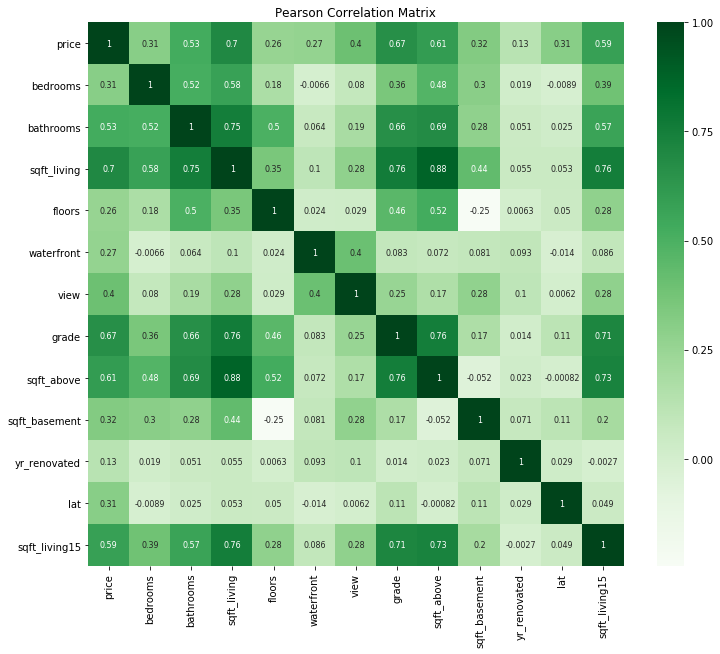

In [13]:
# Use Pearson correlation matrix
fig_1 = plt.figure(figsize=(12, 10))
new_correlations = df.corr()
sns.heatmap(new_correlations, annot=True, cmap='Greens', annot_kws={'size': 8})
plt.title('Pearson Correlation Matrix')
plt.show()

From the above figure, we can see that some features are highly correlated with each other. We will -arbitrarily- search for correlations above 0.75 and remove the features with the lowest correlation with the target variable (price).

In [14]:
# Determine the highest intercorrelations
highly_correlated_features = new_correlations[new_correlations > 0.75]
highly_correlated_features.fillna('-')

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15
price,1,-,-,-,-,-,-,-,-,-,-,-,-
bedrooms,-,1,-,-,-,-,-,-,-,-,-,-,-
bathrooms,-,-,1,0.754665,-,-,-,-,-,-,-,-,-
sqft_living,-,-,0.754665,1,-,-,-,0.762704,0.876597,-,-,-,0.75642
floors,-,-,-,-,1,-,-,-,-,-,-,-,-
waterfront,-,-,-,-,-,1,-,-,-,-,-,-,-
view,-,-,-,-,-,-,1,-,-,-,-,-,-
grade,-,-,-,0.762704,-,-,-,1,0.755923,-,-,-,-
sqft_above,-,-,-,0.876597,-,-,-,0.755923,1,-,-,-,-
sqft_basement,-,-,-,-,-,-,-,-,-,1,-,-,-


Once more, this is contestable and the result of my own interpretation, but I am of the opinion that although there are sets of variables which are indeed highly correlated, they ultimately represent two independent variables. I believe this to be the case with the following sets of variables:
- ("bathrooms", "sqft_living") 
- ("grade", "sqft_living")
- ("grade", sqft_above")

In contrast, I deem that the variable "sqft_living" is not only highly correlated with "sqft_above" (0.877) and "sqft_living15" (0.756), but that it really represents most of the information we need for the linear regression. Indeed, according to the description of the original dataset found on [Kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction), "sqft_above" is the square footage of the house apart from the basement and "sqft_living15" is the square footage of the living room area in 2015 (which implies renovations). It is also useful to note that the variable "grade" is given by the King County grading system and refers to the types of materials used and the quality of workmanship (more info can be found [here](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#g))

Thus, I chose to remove two more features ("sqft_above" and "sqft_living15") and keep "sqft_living" which has the highest correlation with the target variable (0.702).

In [15]:
# Remove features which are highly correlated with "sqft_living"
df = df.drop(['sqft_above', 'sqft_living15'], axis=1)

We are ultimately left with 10 features that will be used for the linear regression. Let us update the features and store their number.

In [16]:
# Update features and store their length
features = df.iloc[:, 1:].columns.tolist()
len_of_features = len(features)
len_of_features

10

## 4. Multivariate linear regression

In this section, we are going to implement our linear regression algorithm. At the very beggining, we are going to normalize the data so as to ensure an efficient convergence of the model.

In [17]:
# Normalize the data
df = (df - df.mean())/df.std()

Now we are going to create the X, y and theta (Θ) matrices. We could also use for-loops; however, the NumPy library is able to handle numerical computations more efficiently if the operations are vectorized.

In [18]:
# Create X, y and theta
X = df.iloc[:, 1:]
ones = np.ones([len(df), 1])
X = np.concatenate((ones, X), axis=1)
y = df.iloc[:, 0:1].values
theta = np.zeros([1, len_of_features + 1])

We are also going to store the target variable and check the size of the matrices.

In [19]:
# Store target
target = y

# Display the size of the matrices
X.shape, y.shape, theta.shape

((21613, 11), (21613, 1), (1, 11))

At this point, let's define the function which computes the cost function J(Θ).

In [20]:
# Define computecost function
def computecost(X, y, theta):
    H = X @ theta.T
    J = np.power((H - y), 2)
    sum = np.sum(J)/(2 * len(X))
    return sum

It is necessary to set the parameters of the model, i.e. the number of the total iterations as well as the learning rate  alpha (α). Feel free to experiment by changing these parameters and checking if and how quickly does the model converge.

In [21]:
# Set iterations and alpha (learning rate)
alpha = 0.01
iterations = 500

We will also define the function which does the gradient descent, by minimizing the cost function.

In [22]:
# Define gradientdescent function
def gradientdescent(X, y, theta, iterations, alpha):
    cost = np.zeros(iterations)
    for i in range(iterations):
        H = X @ theta.T
        theta = theta - (alpha/len(X)) * np.sum(X * (H - y), axis=0)
        cost[i] = computecost(X, y, theta)
    return theta, cost

Now is the most important step in which we will actually do the gradient descent and print the final theta. This is where the "learning" part takes place.

In [23]:
# Do Gradient Descent and display final theta
final_theta, cost = gradientdescent(X, y, theta, iterations, alpha)
final_theta

array([[-6.56617496e-14, -4.15529007e-02,  3.42523556e-02,
         3.70716125e-01, -3.14438312e-02,  1.38103483e-01,
         1.42237238e-01,  3.08420875e-01,  3.14125841e-02,
         6.31448628e-02,  2.47029372e-01]])

What is more, we will compute and print the final cost.

In [24]:
final_cost = computecost(X, y, final_theta)
final_cost

0.1708333631532382

In order to check whether our algorithm converges, we will plot the Iterations vs. Cost figure.

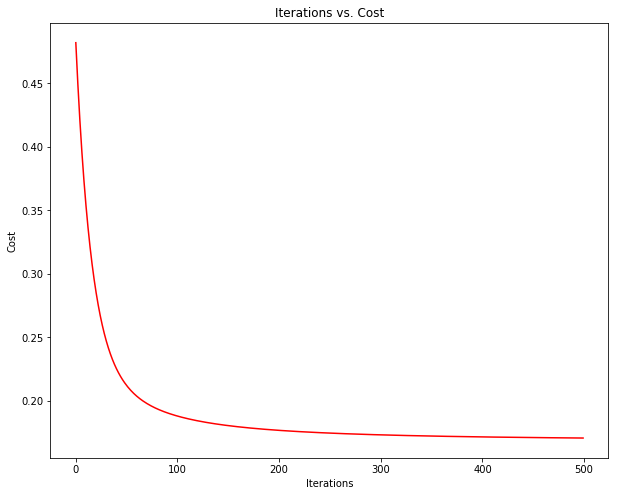

In [25]:
fig_2, ax = plt.subplots(figsize=(10, 8))
ax.plot(np.arange(iterations), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Iterations vs. Cost')
plt.show()

Lastly, we will define a function which computes the Root Mean Squared Error (RMSE) so as to measure the differences between the  values predicted by our model and the observed values we had in the beggining of our analysis.

In [26]:
# Define rmse function
def rmse(target, final_theta):
    predictions = X @ final_theta.T
    return np.sqrt(((predictions[:, 0] - target[:, 0]) ** 2).mean())

# Compute and display Root Mean Squared Error
rmse_val = rmse(target, final_theta)
rmse_val

0.5845226482408328

## 5. Conclusion

In this notebook, we applied a multivariate linear regression algorithm so as to predict the house sale prices in King County, USA. The code was greatly detailed and included an exploratory analysis of the dataset and a comprehensive feature selection. In order to get a closer look on what is going on behind the scenes, we used only Pandas and NumPy libraries. 

As I said in the beggining, I am open to any questions, comments and ideas on how to improve the kernel. I hope that it proved useful and that you enjoyed it.

If you want to access the original code and Jupyter Notebook, you can find them on [GitHub](https://github.com/droussis/linear-regression-house-prices).

Apart from Andrew Ng's course (and the contents of Week 1 and 2, in particular), my implementation was also greatly influenced by the two following websites:
- https://medium.com/we-are-orb/multivariate-linear-regression-in-python-without-scikit-learn-7091b1d45905
- https://towardsdatascience.com/andrew-ngs-machine-learning-course-in-python-linear-regression-dd04fba8e137